### Student Information
Name: 陳宥任

Student ID: 111071603

GitHub ID: Kris0214

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

In [22]:
### Begin Assignment Here
# import the module
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [23]:
# Data preparation
df_1 = pd.read_csv('amazon_cells_labelled.txt', sep='\t',names=['sentence','score'])
df_1['source'] = pd.Series(['amazon']*len(df_1))
df_2 = pd.read_csv('imdb_labelled.txt', sep='\t',names=['sentence','score'])
df_2['source'] = pd.Series(['imdb']*len(df_2))
df_3 = pd.read_csv('yelp_labelled.txt', sep='\t',names=['sentence','score'])
df_3['source'] = pd.Series(['yelp']*len(df_3))
df = pd.concat([df_1,df_2,df_3],axis=0)
df.reset_index(drop=True, inplace=True)
df

,sentence,score,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp


In [24]:
# Check whether there exists missing value
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,source
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


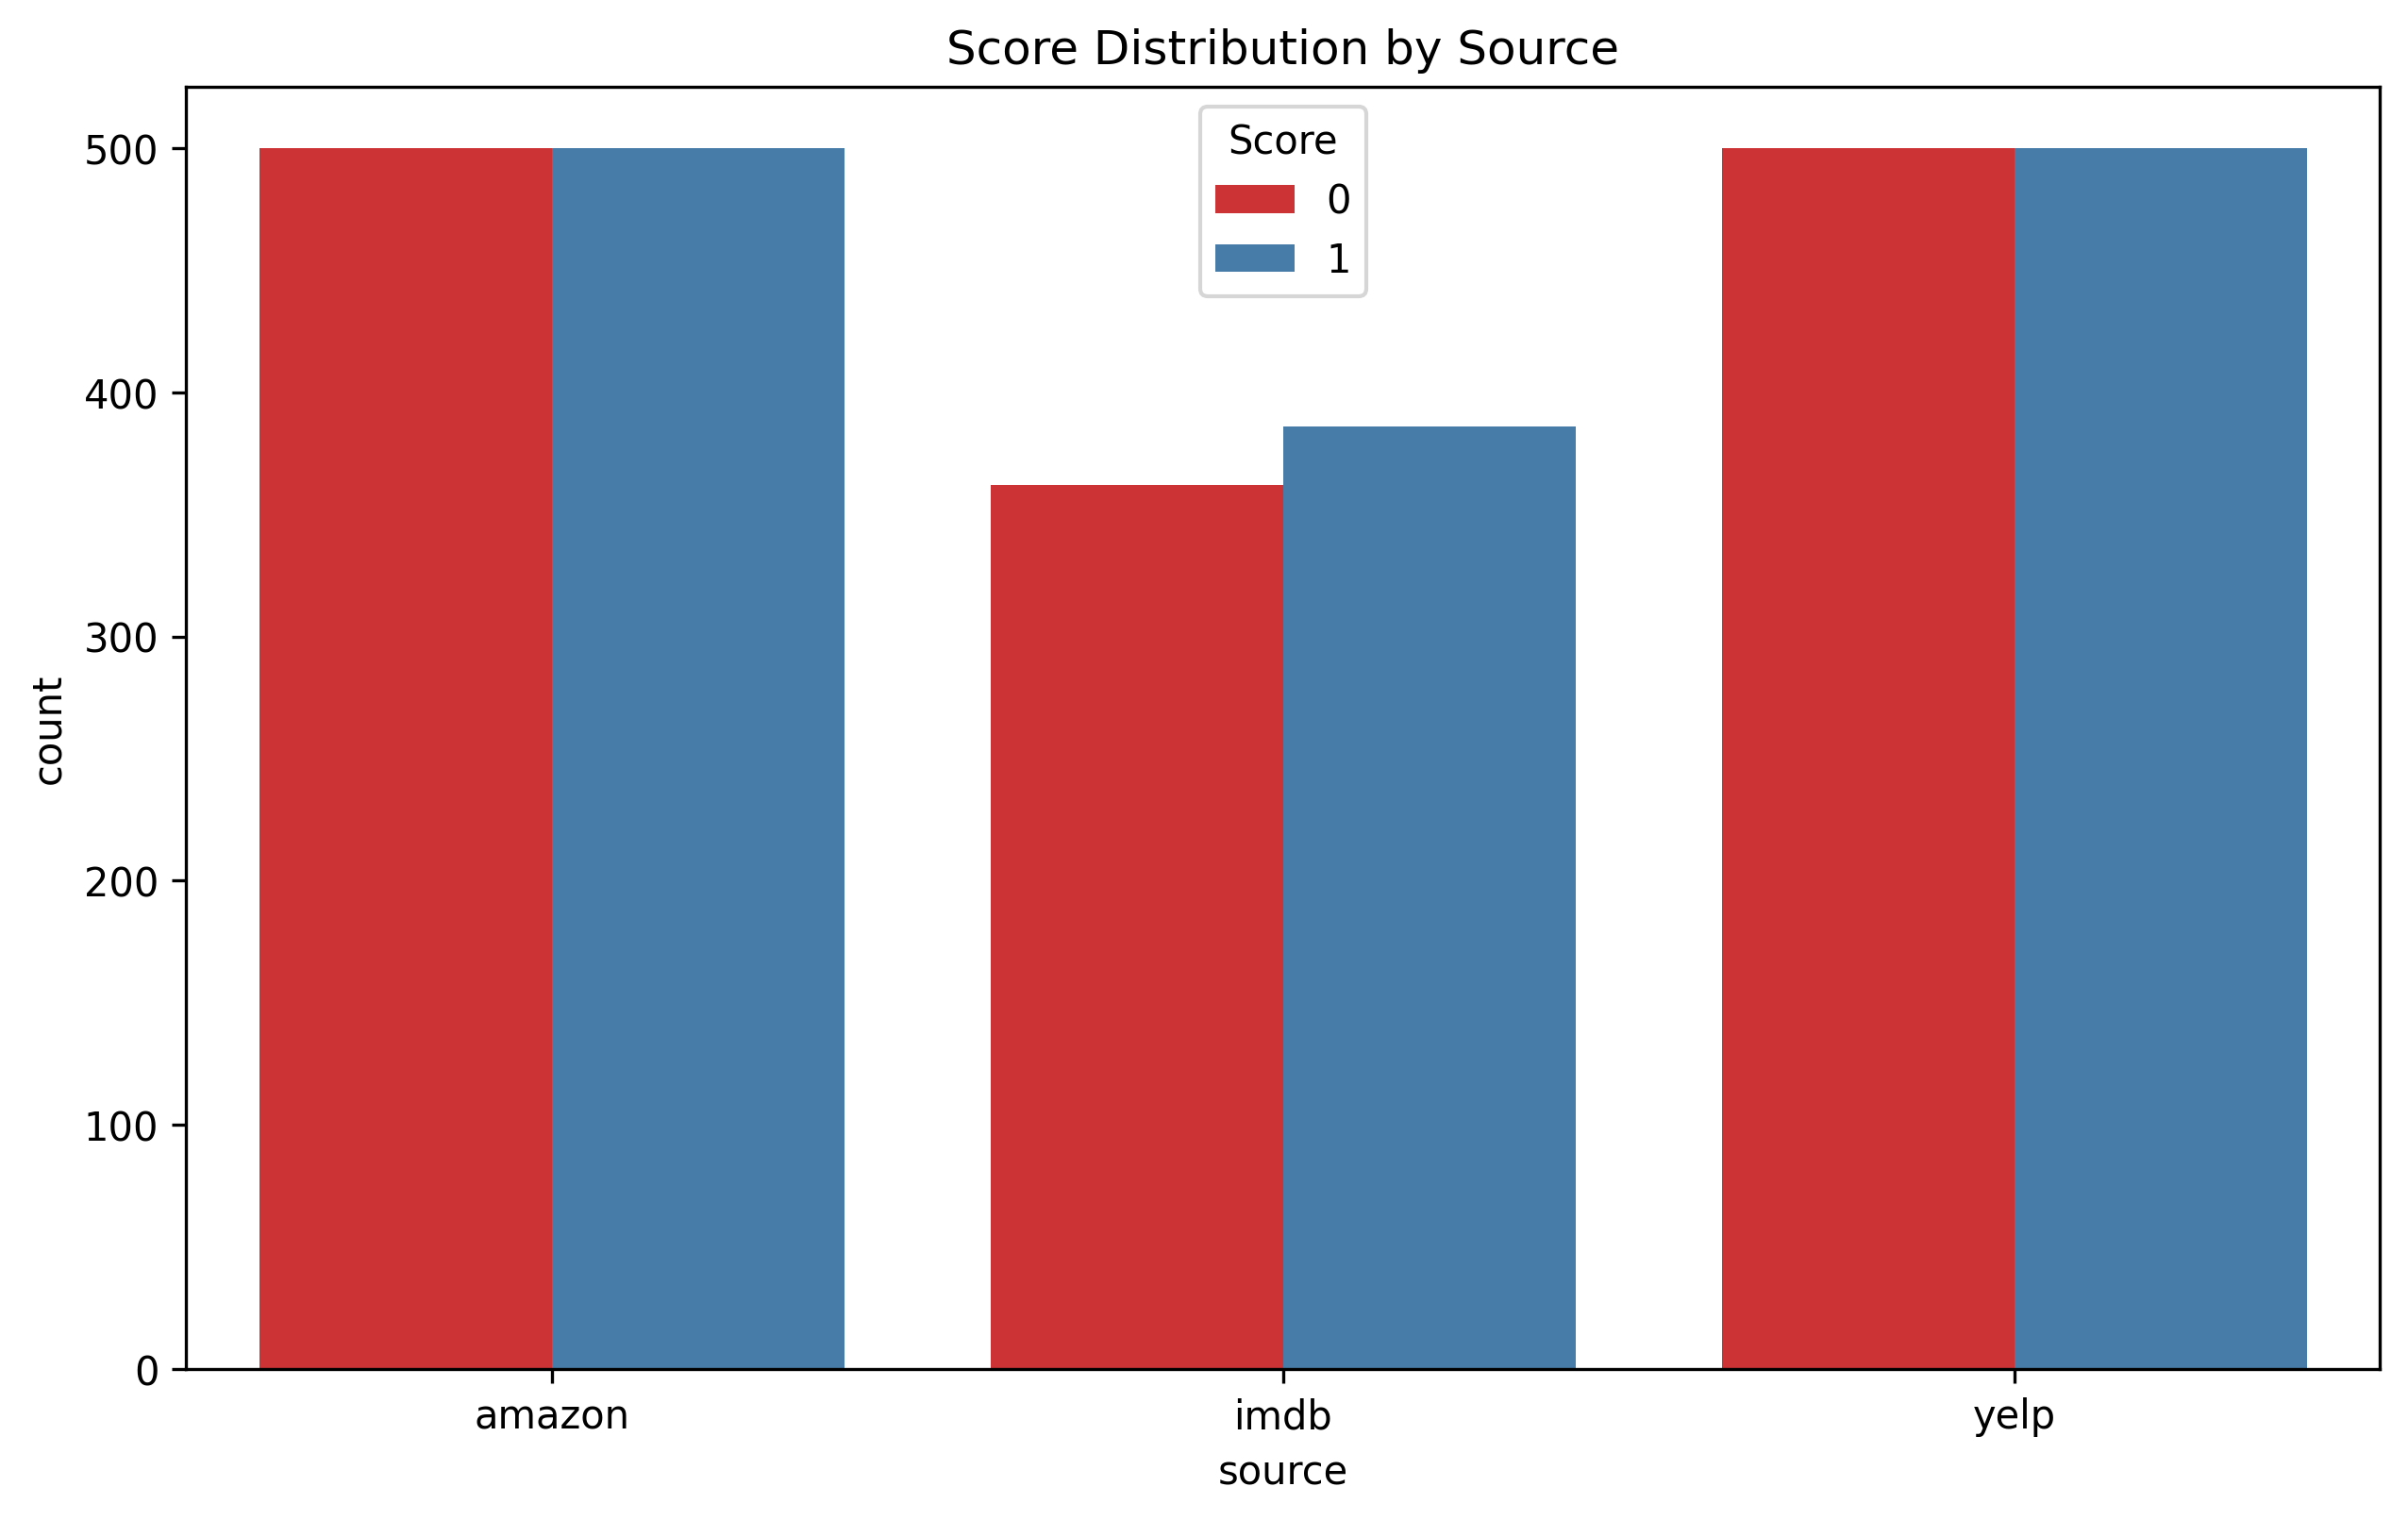

source  score
amazon  0        500
        1        500
imdb    0        362
        1        386
yelp    0        500
        1        500
dtype: int64


In [25]:
# Visulization 1: Score counts for each source
plt.figure(figsize=(10, 6),dpi=300)

sns.countplot(df, x="source", hue="score", palette="Set1")
plt.title("Score Distribution by Source")
plt.legend(title="Score", labels=["0", "1"])

plt.show()  

grouped = df.groupby(['source', 'score']).size()
print(grouped)

In [26]:
# Create DTM
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df['sentence']) 
print(df_counts.shape)
# print(df_counts[0])
# count_vect.get_feature_names_out()[4161]
analyze = count_vect.build_analyzer()
# analyze(df['sentence'][0])

(2748, 5155)


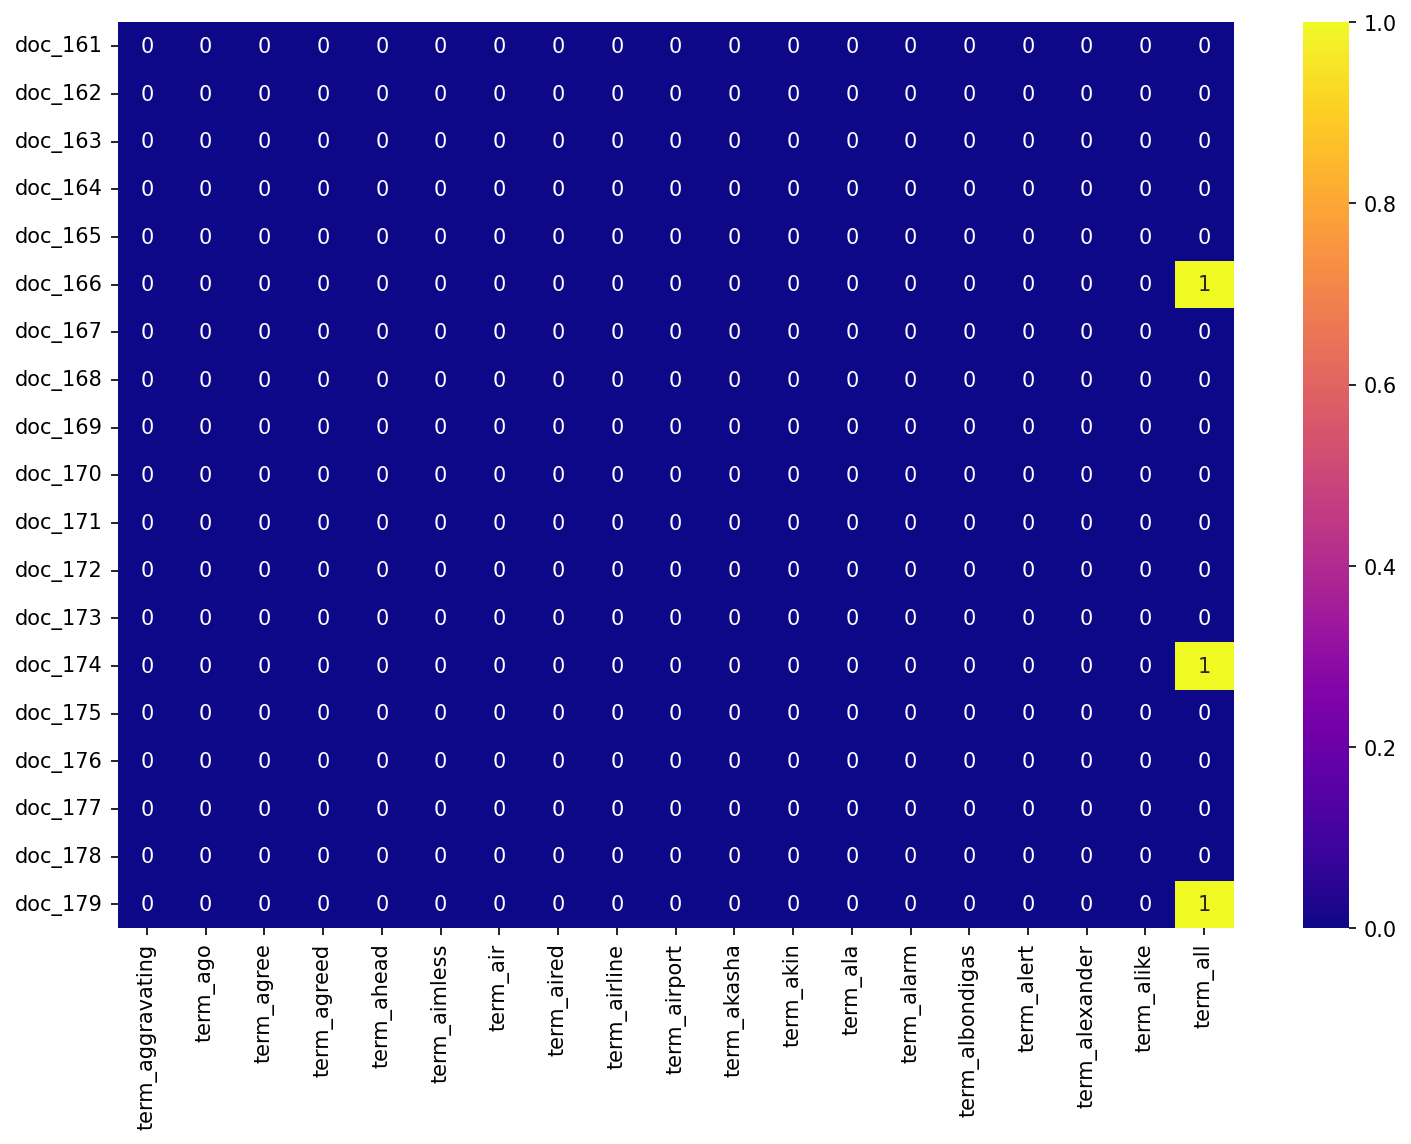

In [27]:
# Visulization 2: Heatmap of the unigram
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[161:180]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[161:180]]
df_todraw = pd.DataFrame(df_counts[161:180,161:180].toarray(), columns = plot_x, index = plot_y)

plt.figure(figsize=(12, 8), dpi=150) 
ax = sns.heatmap(df_todraw, cmap="plasma", vmin=0, vmax=1, annot=True)

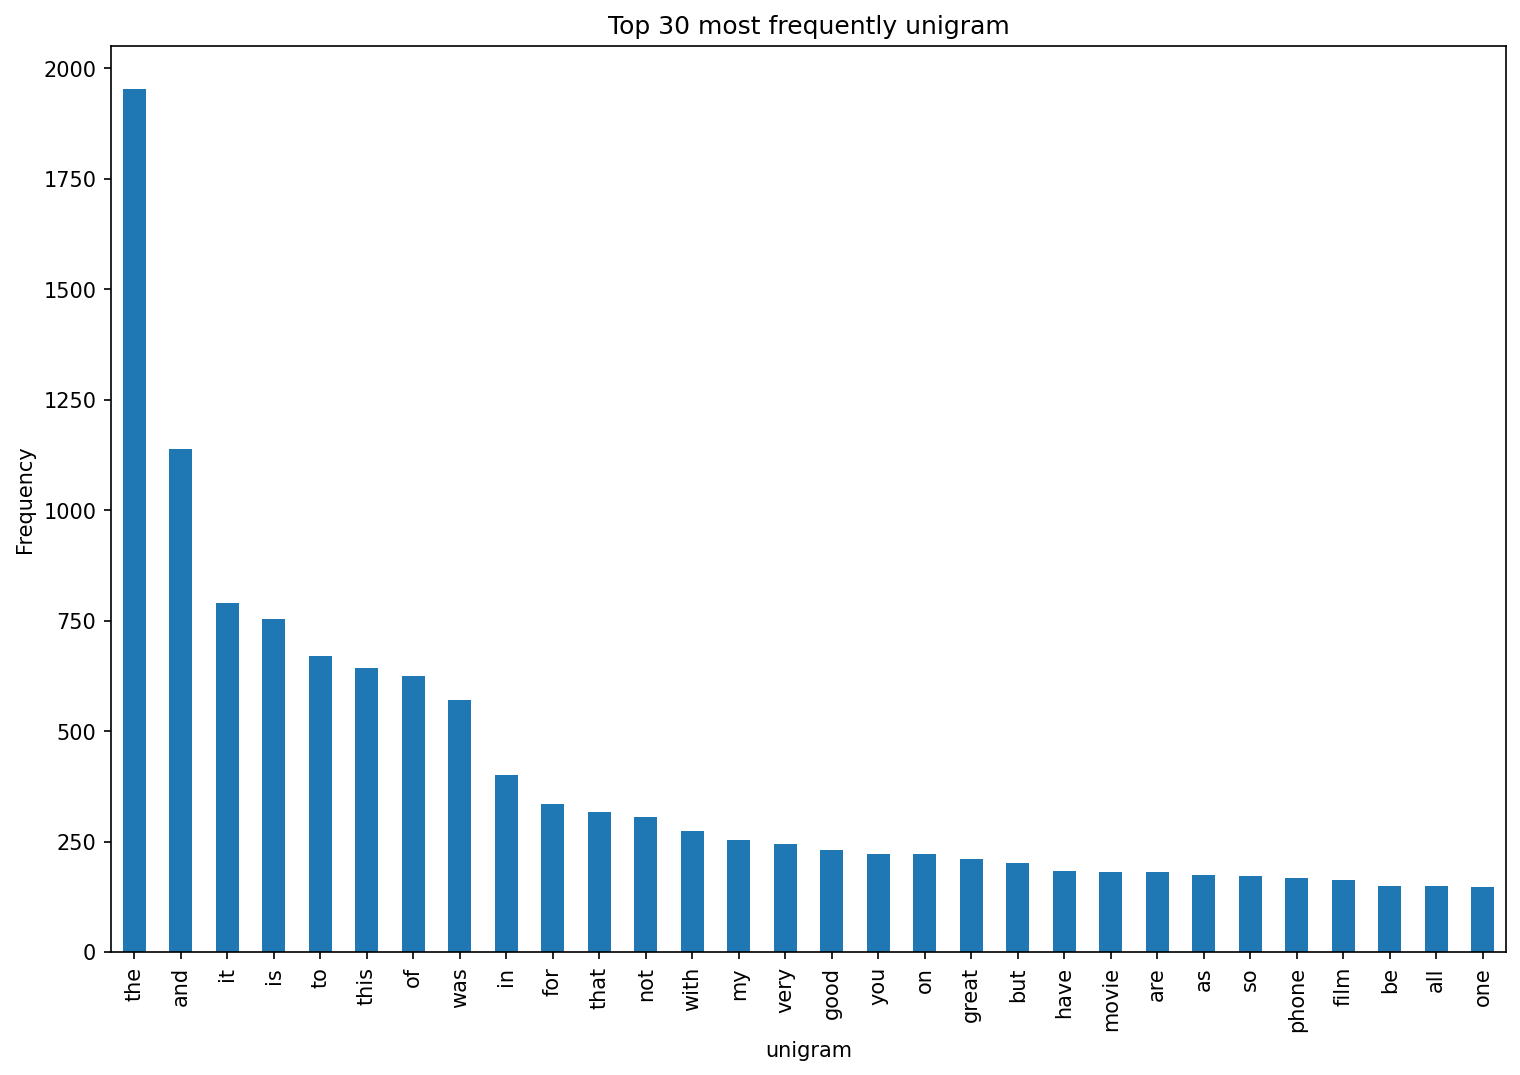

In [28]:
# Visulization 3: Frequency of the unigram

term_frequencies = df_counts.sum(axis=0)
word_counts_df = pd.DataFrame(term_frequencies, columns=count_vect.get_feature_names_out())
top_30_words = word_counts_df.sum().sort_values(ascending=False).head(30)

plt.figure(figsize=(12, 8), dpi=150) 
top_30_words.plot(kind='bar')
plt.xlabel('unigram')
plt.ylabel('Frequency')
plt.title('Top 30 most frequently unigram')

plt.xticks(rotation=90)  
plt.show()



In [29]:
# TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
text_data = df['sentence']
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
# Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = tfidf_matrix.toarray()
y = df['source']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

nb_classifier = MultinomialNB(alpha=0.5)
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.8654545454545455